# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import requests
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read the first dataset into a dataframe
twitter_data = pd.read_csv("datasets/twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#we download the the image prediction dataset from the provided url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

r = requests.get(url)

In [4]:
#we save the downloaded file to disk
folder_name= "datasets"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open("image_predictions.tsv", "wb") as file:
    file.write(r.content)

In [5]:
#we load the download image_prediction dataset into dataframe
image_prediction = pd.read_csv("datasets/image_predictions.tsv", sep="\t")


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#due to the inability to register for Twitter developer API we are going to the provided "tweet_json.txt" file provided for this purpose

# We will extract the tweet details from the the API using the code provided in the twitter-api.py
# Collect ids of tweets 

ids = []

# Tweet id of deleted tweets
deleted_ids = []

def get_tweet():
    if os.path.isfile("datasets/tweet-json.txt"):
        print("File exists!")
        value = 0
    else:
       
        count = 0

       
        with open('datasets/tweet-json.txt', 'w') as file:
            start = time.time()
            for tweet_id in tweet_ids:
                count = count + 1
           
                try:
                    status = api.get_status(tweet_id, tweet_mode = 'extended')
                    file.write(json.dumps(status._json))
                    file.write('\n')
                    ids.append(tweet_id)
                    print("{}) Successful id: {}".format(count, tweet_id))
              
                except:
                    deleted_ids.append(tweet_id)
                    print("{}) Failed id: {}".format(count, tweet_id))
            end = time.time()
            print("Time taken: {}".format(end - start))
        value = 1
    return value



In [7]:
value = get_tweet()

File exists!


In [8]:
if value == 1:
    print(len(working_ids))
    print(len(removed_ids))
else:
    print("File available")

File available


In [9]:
# Empty list 
tweet_json = []

# Read file
with open("datasets/tweet-json.txt") as f:
    for line in f:
        # Converting the string into a dictionary
        data = json.loads(line) 
        tweet_json.append(data)

tweet_json = pd.DataFrame(tweet_json)

In [10]:
tweet_json 

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


## The three dataset gathered are:
1) twitter_data
2) image_prediction
3) tweet_json

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### In this section we shall get the information about each of our datasets.

In [11]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### We shall inspect our dataset by calling the head method

In [14]:
twitter_data.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
tweet_json.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [17]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_json.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [20]:
twitter_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
tweet_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [23]:
#From the visual assessment we are going to confirm some of our observations programmatically
twitter_data['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [24]:
twitter_data["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### From the visual and programmatic assessments of our datasets, the following issues are found:

### Quality issues
1. Not all ratings are dog ratings and some are retweets, only original ratings that have images are needed.

2. The "source" column in twitter_data and tweet_json dataset contains residual html tags from the web scrapping.

3. The "tweet_id" column in the twitter_data and image_prediction dataset are in int64 data type instead of in the string format.

4. The "timestamp" column in twitter_data and the "created_at" column in the tweet_json dataset ought to be in datetime format rather than in object format.

5. The "rating_denominator" ought to be 10 and not greater or lesser, the "rating_denominator" column however, contains values greater or lesser than 10.  

6. The "rating_numerator" contains outliers. 

7. The "name" column in the twitter_data dataset contains unconventional names such as "a".

8. The "name", "doggo", "floofer", "pupper", "puppo" contains the string "None" as an indicator of "no value" - null.

### Tidiness issues
1. The "doggo", "floofer", "pupper", "puppo" columns in the twitter_data dataset signifies the stages of dog growth, being a categorical attribute and for efficient analysis the columns should be merge to become one.

2. The three dataset have tweet_id in them and the three tables should be merge to become one for efficient and effective analysis.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
twitter_data_copy = twitter_data.copy()
image_prediction_copy = image_prediction.copy()
tweet_json_copy = tweet_json.copy()

### Issue #1:

#### Define:  
No 10 - The three dataset have tweet_id in them and the three tables should be merge to become one for efficient and effective analysis

#### Code

In [26]:
#The master_dataset is the result of the merger of the three previously used datasets.
master_dataset = pd.merge(twitter_data_copy,image_prediction_copy, how = "outer" )
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Test


In [27]:
assert len(master_dataset.columns) == 28, f"the columns are more or less than 28"

In [28]:
tweet_json_copy = tweet_json_copy.rename(columns = {"id":"tweet_id"})
tweet_json_copy

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [29]:
master_dataset = pd.merge(master_dataset,tweet_json_copy)
master_dataset.info()
master_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2354 non-null   int64  
 1   in_reply_to_status_id          78 non-null     float64
 2   in_reply_to_user_id            78 non-null     float64
 3   timestamp                      2354 non-null   object 
 4   source                         2354 non-null   object 
 5   text                           2354 non-null   object 
 6   retweeted_status_id            179 non-null    float64
 7   retweeted_status_user_id       179 non-null    float64
 8   retweeted_status_timestamp     179 non-null    object 
 9   expanded_urls                  2295 non-null   object 
 10  rating_numerator               2354 non-null   int64  
 11  rating_denominator             2354 non-null   int64  
 12  name                           2354 non-null   o

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [30]:
assert len(master_dataset.columns) == 55, f"the columns are more or less than 55"

### Issue #2:

#### Define

No 1 - Not all ratings are dog ratings and some are retweets, only original ratings that have images are needed

#### Code

In [31]:
#Get the observations that are not dogs
not_dogs = master_dataset.query("p1_dog == False and p2_dog == False and p3_dog == False")
not_dogs[["p1_dog", "p2_dog", "p3_dog"]]

,p1_dog,p2_dog,p3_dog
0,False,False,False
21,False,False,False
27,False,False,False
56,False,False,False
57,False,False,False
...,...,...,...
2328,False,False,False
2332,False,False,False
2335,False,False,False
2336,False,False,False


In [32]:
#drop the observations that are not dogs
master_dataset.query("p1_dog == False and p2_dog == False and p3_dog == False")
master_dataset.drop(master_dataset.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

#### Test

In [33]:
assert len(master_dataset.query("p1_dog == False and p2_dog == False and p3_dog == False")) == 0, f"there are observations that are not dogs"

In [34]:
#we will check if there are any retweets
master_dataset[master_dataset["retweeted"] == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


### Issue #3:

#### Define
No 2 - The "source" column in twitter_data and tweet_json dataset contains residual html tags from the web scrapping

#### Code

In [35]:
master_dataset["source"] = master_dataset["source"].str.extract("\>(.*?)\<", expand = True)

#### Test

In [36]:
source = master_dataset["source"]
source[source.str.contains("<" or ">")] == []

Series([], Name: source, dtype: bool)

### Issue #4:

#### Define
No 3 - The "tweet_id" column in the twitter_data and image_prediction dataset are in int64 data type instead of in the string format.

#### Code

In [37]:
master_dataset["tweet_id"] = master_dataset["tweet_id"].astype(str)

#### Test

In [38]:
assert master_dataset["tweet_id"].dtypes == 'O' , f"the data type is not string"

### Issue #5:

#### Define
No 4 -  The "timestamp" column in twitter_data and the "created_at" column in the tweet_json dataset ought to be in datetime format rather than in object format.

#### Code

In [39]:
master_dataset["timestamp"] = pd.to_datetime(master_dataset["timestamp"]) 

#### Test

In [40]:
master_dataset["timestamp"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2031 entries, 1 to 2353
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2031 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 31.7 KB


### Issue #6:

#### Define
No 5 -The "rating_denominator" ought to be 10 and not greater or lesser, the "rating_denominator" column however, contains values greater or lesser than 10.  

#### Code

In [41]:
to_drop = master_dataset.query("rating_denominator>10 or rating_denominator < 10 ").index
to_drop

Int64Index([ 312,  341,  432,  515,  783,  900, 1066, 1163, 1200, 1226, 1252,
            1272, 1349, 1431, 1596, 1632, 1633, 1660, 1661, 1777, 1841, 2333],
           dtype='int64')

In [42]:
master_dataset.drop(to_drop, inplace=True)

#### Test

In [43]:
master_dataset.query("rating_denominator>10 or rating_denominator < 10 ")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


### Issue #7:

#### Define
No 6 - The "rating_numerator" contains outliers. 

#### Code

In [44]:
master_dataset["rating_numerator"].describe()

count    2009.000000
mean       11.653061
std        17.853420
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       666.000000
Name: rating_numerator, dtype: float64

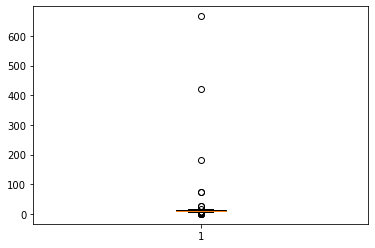

In [45]:
plt.boxplot(master_dataset["rating_numerator"]);

In [46]:
rate_numerator_outlier = master_dataset.query("rating_numerator == 70 or rating_numerator > 70")
rate_numerator_outlier.index

Int64Index([187, 188, 289, 339, 694], dtype='int64')

In [47]:
master_dataset.drop(rate_numerator_outlier.index, inplace =True)

#### Test

In [48]:
master_dataset.query("rating_numerator == 70 or rating_numerator > 70")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


### Issue #8:

#### Define
No 7 - The "name" column in the twitter_data dataset contains unconventional names such as "a"

#### Code

In [49]:
master_dataset.drop(master_dataset[master_dataset["name"] == "a"].index, inplace=True)

#### Test

In [50]:
assert (master_dataset["name"] == "a").sum() == 0, f"the name attribute contains unconventional dog name"

### Issue #9:

#### Define
No 8 - The "name", "doggo", "floofer", "pupper", "puppo" contains the string "None" as an indicator of "no value" - null.

#### Code

In [51]:
def replaceValue(x):
    master_dataset[x] = master_dataset[x].replace("None", np.nan)

In [52]:
replaceValue("name")

In [53]:
replaceValue("doggo")

In [54]:
replaceValue("floofer")

In [55]:
replaceValue("pupper")

In [56]:
replaceValue("puppo")

#### Test

In [57]:
assert master_dataset["name"].str.contains("None").sum() == 0, f"the name attribute contains the value 'None'."

In [58]:
assert master_dataset["doggo"].str.contains("None").sum() == 0, f"the name attribute contains the value 'None'."

In [59]:
assert master_dataset["floofer"].str.contains("None").sum() == 0, f"the name attribute contains the value 'None'."

In [60]:
assert master_dataset["pupper"].str.contains("None").sum() == 0, f"the name attribute contains the value 'None'."

In [61]:
assert master_dataset["puppo"].str.contains("None").sum() == 0, f"the name attribute contains the value 'None'."

### Issue #10:

#### Define
No 10 - The "doggo", "floofer", "pupper", "puppo" columns in the twitter_data dataset signifies the stages of dog growth, being a categorical attribute and for efficient analysis the columns should be merge to become one.

#### Code

In [62]:
def replaceValue(x):
    master_dataset[x] = master_dataset[x].replace(np.nan, "")

In [63]:
replaceValue("doggo")

In [64]:
replaceValue("floofer")

In [65]:
replaceValue("pupper")

In [66]:
replaceValue("puppo")

In [67]:
#combine the four columns
master_dataset["stages"] = master_dataset["doggo"].astype(str)+master_dataset["floofer"].astype(str) +master_dataset["pupper"].astype(str)+master_dataset["puppo"].astype(str)  

In [68]:
master_dataset["stages"].value_counts()

                1634
pupper           202
doggo             73
puppo             28
doggopupper       11
floofer            9
doggopuppo         1
doggofloofer       1
Name: stages, dtype: int64

In [69]:
master_dataset["stages"].replace("", np.nan, inplace=True)

In [70]:
master_dataset["stages"].value_counts()

pupper          202
doggo            73
puppo            28
doggopupper      11
floofer           9
doggopuppo        1
doggofloofer      1
Name: stages, dtype: int64

In [71]:
master_dataset.drop(master_dataset[["doggo", "floofer", "pupper", "puppo"]], axis=1, inplace=True)

#### Test

In [72]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 1 to 2353
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1959 non-null   object             
 1   in_reply_to_status_id          67 non-null     float64            
 2   in_reply_to_user_id            67 non-null     float64            
 3   timestamp                      1959 non-null   datetime64[ns, UTC]
 4   source                         1959 non-null   object             
 5   text                           1959 non-null   object             
 6   retweeted_status_id            162 non-null    float64            
 7   retweeted_status_user_id       162 non-null    float64            
 8   retweeted_status_timestamp     162 non-null    object             
 9   expanded_urls                  1907 non-null   object             
 10  rating_numerator        

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
master_dataset.to_csv("datasets/twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Iphone users engage more with we rate dog twitter site than other device users as seen below (visualization 1). We rate dogs can target Iphone users in their ad marketing to drive more user conversation and engagement. 

2. The Golden Retriever is the most favourited dog breed among the audience of we rate dog.
3. The three prediction alogrithms detects different breeds from the image presented, hence there is a need retrain the classification model. 

### Visualization

#### 1) What device do users of we rate dogs twitter use more?

In [74]:
source = master_dataset["source"].value_counts()
source


Twitter for iPhone     1836
Vine - Make a Scene      91
Twitter Web Client       23
TweetDeck                 9
Name: source, dtype: int64

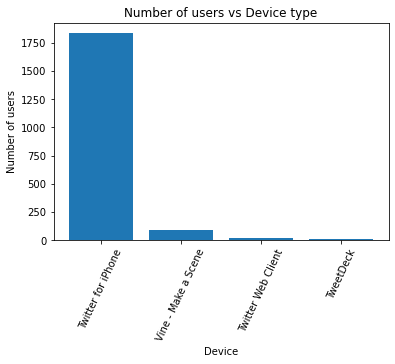

In [75]:

plt.bar(x = source.index, height = source.values)
plt.xlabel("Device")
plt.ylabel("Number of users")
plt.title("Number of users vs Device type")
plt.xticks(rotation=65);

#### 2) What is the most favourited breed of dog using p1_dog prediction

In [76]:
favorited = master_dataset.groupby("p1")["favorite_count"].sum().sort_values(ascending = False)[ : 11]
favorited

p1
golden_retriever      1659340
Labrador_retriever    1111410
Pembroke               974752
Chihuahua              673876
Samoyed                491651
French_bulldog         465738
chow                   401840
pug                    317761
cocker_spaniel         315525
Pomeranian             274880
Cardigan               260287
Name: favorite_count, dtype: int64

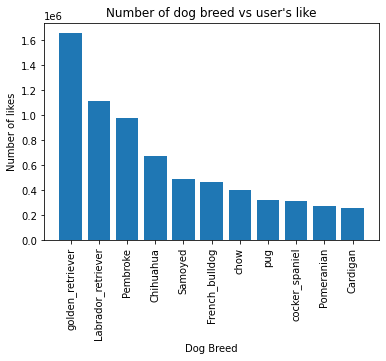

In [77]:
plt.bar(x = favorited.index, height = favorited.values)
plt.xlabel("Dog Breed")
plt.ylabel("Number of likes")
plt.title("Number of dog breed vs user's like")
plt.xticks(rotation=90);

#### 3) What is the distribution of the breeds of dog using the three image predictions of dogs.

In [78]:
predictions = master_dataset[["p1", "p2", "p3"]]
predictions

,p1,p2,p3
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
5,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
...,...,...,...
2342,Gordon_setter,Yorkshire_terrier,Pekinese
2343,golden_retriever,Tibetan_mastiff,Labrador_retriever
2344,miniature_poodle,komondor,soft-coated_wheaten_terrier
2349,miniature_pinscher,Rottweiler,Doberman


In [79]:
master_dataset.query("p1 == p2 == p3")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,stages


In [80]:
p1= master_dataset.groupby("p1")["p1"].count()
p1

p1
Afghan_hound                       4
African_hunting_dog                1
Airedale                          12
American_Staffordshire_terrier    13
Angora                             1
                                  ..
window_shade                       1
wire-haired_fox_terrier            2
wombat                             1
wood_rabbit                        1
wool                               1
Name: p1, Length: 215, dtype: int64

In [81]:
 p2 = master_dataset.groupby("p2")["p2"].count()
 p2

p2
Afghan_hound                       5
Airedale                           7
American_Staffordshire_terrier    21
American_black_bear                2
Angora                             2
                                  ..
whippet                           15
white_wolf                         1
wig                                1
wire-haired_fox_terrier            3
wood_rabbit                        1
Name: p2, Length: 226, dtype: int64

In [82]:
p3 = master_dataset.groupby("p3")["p3"].count()
p3

p3
Afghan_hound                       4
Airedale                          11
American_Staffordshire_terrier    23
American_black_bear                1
Angora                             2
                                  ..
wild_boar                          1
window_screen                      1
wire-haired_fox_terrier            3
wok                                1
wombat                             1
Name: p3, Length: 231, dtype: int64

In [83]:
named =pd.Series(pd.concat([p1,p2,p3]).index.unique())
named 

0                        Afghan_hound
1                 African_hunting_dog
2                            Airedale
3      American_Staffordshire_terrier
4                              Angora
                    ...              
340                              titi
341                            tripod
342                         wild_boar
343                     window_screen
344                               wok
Length: 345, dtype: object

In [84]:
three_predictions = pd.DataFrame([p1, p2,p3]).T
three_predictions

,p1,p2,p3
Afghan_hound,4.0,5.0,4.0
African_hunting_dog,1.0,NaN,NaN
Airedale,12.0,7.0,11.0
American_Staffordshire_terrier,13.0,21.0,23.0
Angora,1.0,2.0,2.0
...,...,...,...
titi,NaN,NaN,1.0
tripod,NaN,NaN,1.0
wild_boar,NaN,NaN,1.0
window_screen,NaN,NaN,1.0
